In [1]:
import aacgmv2
import os
import sys
import psycopg2

import datetime as dt
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mpl_toolkits.basemap import Basemap
from itertools import chain
from tqdm import tqdm

import utils
from utils import local_data
from utils import window

%matplotlib inline

In [2]:
df_series_vtec = pd.read_pickle(os.path.join(local_data, "station_data_series_tec.pkl.xz"), compression='xz')
df_series_s4 = pd.read_pickle(os.path.join(local_data, "df_series_s4.pkl.xz"), compression='xz')
df_station = pd.read_pickle(os.path.join(local_data, 'df_station_sort.pkl'))

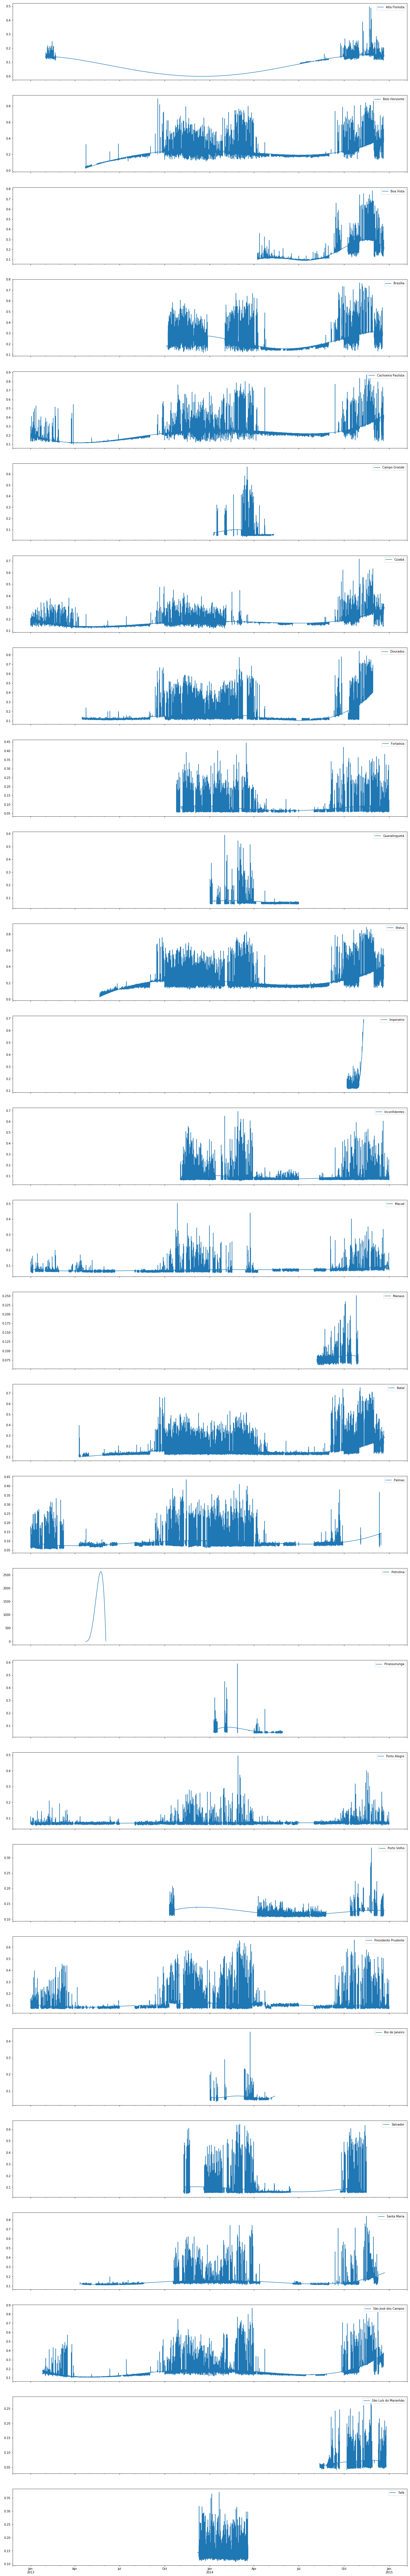

In [3]:
size = df_series_s4.columns.size
fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(df_series_s4.columns):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_s4[i].plot(figsize=(24, 160), ax=ax[idx], label=name)
    ax[idx].legend(loc="upper right")

Analisando os dados os gráficos acima, optou-se por descartar as estações de Petrolina e Imperatriz, cujos idenfiticadores são respectivamentes 'pln' e 'imp'.

In [4]:
remove = ['imp', 'pln']
for i in remove:
    df_station = df_station[df_station.identificationstation != i]
    del df_series_s4[i]
    del df_series_vtec[i]
    

In [5]:
df_station

,identificationstation,alias,height,latitude,longitude,network,state,city,startoperation,stopoperation,city_heigh,city_latitude,city_longitude
city_name_correct,,,,,,,,,,,,,
Alta Floresta,afl,null,267.000,-9.870000,-55.900000,septentrio,mt,alta floresta,NaN,NaN,264.0,-9.90000,-55.9000
Belo Horizonte,bhz,null,858.000,-19.868500,-43.954200,lisn,mg,belo horizonte,NaN,NaN,767.0,-19.81570,-43.9542
Boa Vista,bov,null,69.180,2.833920,-60.695380,lisn,rr,boa vista,NaN,NaN,76.0,2.81954,-60.6714
Brasília,bsa,null,1050.000,-15.764200,-47.869400,lisn,df,brasilia,NaN,NaN,1130.0,-15.78010,-47.9292
Cachoeira Paulista,cpa,null,580.000,-22.410000,-45.000000,lisn,sp,cachoeira paulista,NaN,NaN,545.0,-22.67370,-44.9973
Campo Grande,32,cg01,NaN,-20.497000,-54.615000,septentrio,ms,campos grande,NaN,NaN,612.0,-20.44350,-54.6478
Cuiabá,cub,null,278.000,-15.555200,-56.069800,lisn,mt,cuiaba,NaN,NaN,180.0,-15.59890,-56.0949
Dourados,dou,null,756.120,-22.110000,-54.550000,lisn,ms,dourados,NaN,NaN,448.0,-22.22180,-54.8064
Fortaleza,24,fort,NaN,-3.742000,-38.539000,septentrio,ce,fortaleza,NaN,NaN,14.0,-3.71839,-38.5434


In [6]:
print(df_station[['state', 'identificationstation', 'height', 'latitude', 'longitude', 'mag_latitude', 'mag_longitude', 'city_heigh', 'city_latitude', 'city_longitude']].to_latex())

KeyError: "['mag_latitude' 'mag_longitude'] not in index"

Os dados de S4 englobam dois anos inteiros, o período começando em janeiro de 2013 e terminando em janeiro de 2015. Os dados de vtec por sua vez, restrigem-se a um intervalo menor. Assim, é necessário realizar um corte na série de dados de S4, de forma a ter o mesmo número de analises.

In [ ]:
first_date = df_series_vtec.index[0].to_pydatetime()
last_date = df_series_vtec.index[-1].to_pydatetime()
df_series_vtec.shape

In [ ]:
df_series_s4 = df_series_s4.ix[first_date:last_date]
df_series_s4.shape

In [ ]:
size = df_series_s4.columns.size
fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(df_series_s4.columns):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_s4[i].plot(figsize=(24, 160), ax=ax[idx], label=name)
    ax[idx].legend(loc="upper right")


In [ ]:
remove = ['afl', 'bov', '28', 'pvh', '29']
for i in remove:
    df_station = df_station[df_station.identificationstation != i]
    del df_series_s4[i]
    del df_series_vtec[i]

In [ ]:
size = df_series_s4.columns.size//3
groups = []
for i in range (0, 21, 7):
    groups.append(df_series_s4.columns.ravel()[i:i+7])


In [ ]:
figsize = (24, 40)
latter_size = 14

In [ ]:
fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(groups[0]):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_s4[i].plot(figsize=figize, ax=ax[idx], label=name)
    ax[idx].legend(loc="upper right", prop={'size': latter_size})
    ax[idx].tick_params(axis='both', which='both', labelsize=latter_size)
plt.tight_layout()
plt.savefig('./images/s4_stations0.eps', format='eps', dpi=1000)

In [ ]:
fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(groups[1]):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_s4[i].plot(figsize=figsize, ax=ax[idx], label=latter_size)
    ax[idx].legend(loc="upper right", prop={'size': 16})
    ax[idx].tick_params(axis='both', which='both', labelsize=latter_size)
plt.tight_layout()
plt.savefig('./images/s4_stations1.eps', format='eps', dpi=1000)

In [ ]:
fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(groups[2]):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_s4[i].plot(figsize=figsize, ax=ax[idx], label=name)
    ax[idx].legend(loc="upper right", prop={'size': latter_size})
    ax[idx].tick_params(axis='both', which='both', labelsize=latter_size)
plt.tight_layout()
plt.savefig('./images/s4_stations2.eps', format='eps', dpi=1000)

In [ ]:
df_series_vtec.to_pickle(os.path.join(local_data, "df_series_tec_re.pkl.xz"), compression='xz')
df_series_s4.to_pickle(os.path.join(local_data, "df_series_s4_re.pkl.xz"), compression='xz')
df_station.to_pickle(os.path.join(local_data, 'df_station_sort_re.pkl'))

In [ ]:
mag_lat = df_station['mag_latitude'].values.ravel()
mag_lon = df_station['mag_longitude'].values.ravel()

dtime = dt.datetime(2013, 1, 1)
mag_meridians_lines = []
for lat, lon in zip(mag_lat, mag_lon):
    lats = np.linspace(-90, 90, 720)
    aux_geo_lat = []
    aux_geo_lon = []
    for i in lats:
        geo_lat, geo_lon, _ = aacgmv2.convert_latlon_arr(i, 
                                                         lon, 
                                                         0, 
                                                         dtime=dtime, 
                                                         code="A2G")
        aux_geo_lat.append(float(geo_lat))
        aux_geo_lon.append(float(geo_lon))
        
    mag_meridians_lines.append((aux_geo_lon, aux_geo_lat))

In [ ]:
def draw_map(m, scale=0.2):
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 45), labels=[True, True, True, True])
    lons = m.drawmeridians(np.linspace(-180, 180, 90), labels=[True, True, True, True])
    
    # keys contain the plt.line 2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='b')

In [ ]:
fig = plt.figure(figsize=(26, 26), edgecolor='w')
m = Basemap(projection='cyl',
            resolution='f',
            llcrnrlat=-50,
            urcrnrlat=20,
            llcrnrlon=-90,
            urcrnrlon=-25)
m.drawcoastlines()
m.readshapefile(os.path.join(local_data, 'estados_2010/estados_2010'), 'estados', )
draw_map(m)

for i in mag_meridians_lines:
    m.plot(i[0], i[1], latlon=True, color='r', alpha=0.3)

for i in df_station.itertuples():
    x, y = m(i.longitude, i.latitude)
    m.scatter(x, y, label=i.Index)
    if i.Index not in ['São José dos Campos', 'Cachoeira Paulista', 'Guaratinguetá', 'Inconfidentes', 'Pirassununga']:
        plt.text(x, y, i.Index, fontsize=11)

plt.legend()
plt.savefig('./images/map_stations_re.svg', format='svg', dpi=1000)
plt.show()

In [ ]:
df_station.shape

In [ ]:
df_series_s4_class = pd.DataFrame(index=df_series_s4.index.values)
for i in df_series_s4.columns.values: